In [2]:
%matplotlib inline

In [52]:
import os
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from itertools import islice, product

In [59]:
def array_from_text(text):
    text_stripped = text.replace(' ', '').replace('\n', '')
    meta, content = tuple(text_stripped.split('$'))
    text_points = content.replace(')', '').replace('(', '').split(';')
    pairs = []
    for text_point in text_points:
        pair = [float(x) for x in text_point.split(',')]
        pairs.append(pair)
    return np.array(pairs)

def euclidean(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def between_cluster_sum_of_squares(kmeans_result):
    total_error = 0
    total_mean = np.mean(kmeans_result.cluster_centers_, axis=0)
    for point in kmeans_result.cluster_centers_:
        total_error += euclidean(point, total_mean) ** 2
    return total_error

def find_elbow(series):
    # idea: find the point with the sharpest change
    pass

def n_grams(a, n):
    z = (islice(a, i, None) for i in range(n))
    return zip(*z)

def avg_distance_from_center(points):
    centroid = np.mean(points, axis=0)
    result = 0
    for p in points:
        result += euclidean(p, centroid) / len(points)
    return result

def avg_distance_from_other_clusters(points):
    centroid = np.mean(points, axis=0)
    result = 0
    for p, q in product(points, points):
        if p == q:
            continue
        result += euclidean(p, centroid) / len(points)
    return result

In [81]:
file_handles = [open('datasets/' + file) for file in os.listdir('datasets')]

In [80]:
[fh.close() for fh in file_handles]

[None, None, None]

In [82]:
arr = array_from_text(file_handles[0].read())

In [83]:
kmeans_raw_objects = [KMeans(n_clusters=n) for n in range(2, len(arr))]
kmeans_results_objects = [kmeans.fit(arr) for kmeans in kmeans_raw_objects]
within_series = pd.Series({n: result.inertia_ for n, result in zip(range(2, len(arr)), kmeans_results_objects)})
between_series = pd.Series(
    {n: between_cluster_sum_of_squares(result) for n, result in zip(range(2, len(arr)), kmeans_results_objects)})
avg_from_center_series = pd.Series(
    {n: avg_distance_from_center(result.cluster_centers_) for n, result in zip(range(2, len(arr)), kmeans_results_objects)})

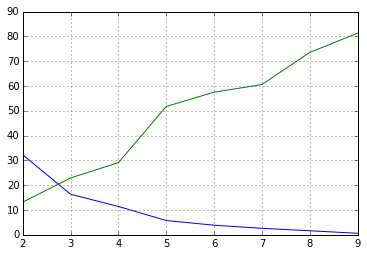

In [84]:
within_series.plot()
between_series.plot()
#(between_series - within_series).plot()

In [85]:
kmeans_results_objects[1].inertia_

16.354166666666664